In [8]:
import pandas as pd 
import numpy as np
import os

In [4]:
miPath = "/Users/User/Documents/Udemy-Cursos/DataScience-Python/python-ml-course/datasets"
miArchivo = "ads/Advertising.csv"
fullPath = os.path.join(miPath, miArchivo)


In [35]:
data_ads = pd.read_csv(fullPath)

In [6]:
data_ads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
len(data_ads)

200

In [10]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [11]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [12]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [13]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [14]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [15]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [17]:
corr_pearson = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [18]:
corr_pearson

0.782224424861606

In [31]:
def corre_coef(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_pearson = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_pearson

In [32]:
corre_coef(data_ads,"TV","Sales")

0.782224424861606

In [36]:
col = data_ads.columns.values

In [37]:
col

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [39]:
for x in col:
    for y in col:
        print(x + ", " + y + ": " + str(corre_coef(data_ads, x, y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583006
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
Radio, TV: 0.05480866446583006
Radio, Radio: 1.0
Radio, Newspaper: 0.35410375076117545
Radio, Sales: 0.576222574571055
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.35410375076117545
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616534
Sales, TV: 0.782224424861606
Sales, Radio: 0.576222574571055
Sales, Newspaper: 0.22829902637616534
Sales, Sales: 1.0


In [40]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en Tv vs Ventas del Producto')

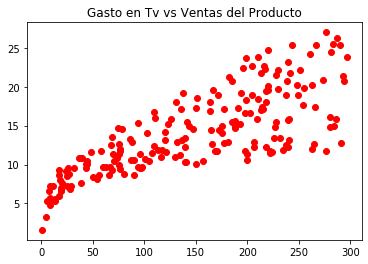

In [43]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en Tv vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

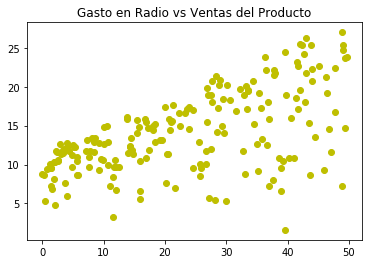

In [49]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "yo")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Diario vs Ventas del Producto')

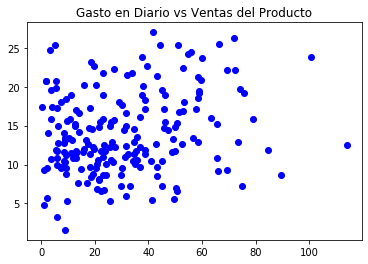

In [46]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Diario vs Ventas del Producto")

In [51]:
data_ads = pd.read_csv(fullPath)
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


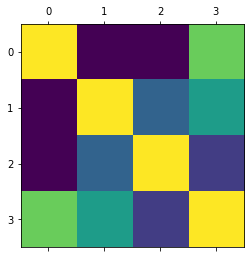

In [52]:
plt.matshow(data_ads.corr())